In [11]:
import sys
sys.path.append('..')

from src.data import conex_file_parser
from src.profile_functions import anormal, gaisser_hillas, usp

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

## Load a single profile

In [6]:
input_files = '../data/conex/p_17-20eV_60deg/sibyll23d/*.root'

parser = conex_file_parser(input_files, ['Xdep', 'dEdX'], 1)
x, y = next(parser)

# Examples using ```curve_fit``` from scipy

In [17]:
def fit_scipy(f, x, y, guess):
  popt, pcov = curve_fit(f, x, y, p0 = guess)
  perr = np.sqrt([pcov[i, i] for i in range(len(guess))])

  plt.fill_between(x, y, color = 'navy', alpha = 0.5, lw = 0)
  plt.plot(x, f(x, *popt), '-', color = 'navy', alpha = 0.7, lw = 2)
  plt.show()

  print('parameters: ', popt)
  print('errors: ', perr)

## 6-parameter Gaisser-Hillas function

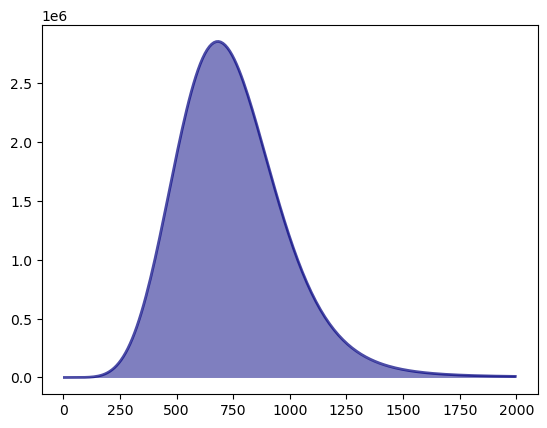

parameters:  [ 2.85435276e+06  6.82149758e+02 -1.54998234e+01  9.25699295e+01
 -6.14466970e-02  3.26541471e-05]
errors:  [9.90414846e+02 1.48736101e-01 6.88531017e+00 1.91045414e+00
 2.51045918e-03 1.05963017e-06]


In [20]:
fit_scipy(gaisser_hillas, x, y, [y.max(), x[y.argmax()], -155, 93, -0.06, 0.00003])